In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [1]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
df.head()

Saving used_cars_data.csv to used_cars_data.csv


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [2]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
df = df.drop_duplicates()


In [4]:
df = df.drop(columns=['New_Price'])


In [5]:
# Mileage
df['Mileage'] = df['Mileage'].str.replace(' km/kg', '')
df['Mileage'] = df['Mileage'].str.replace(' kmpl', '')
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')

# Engine
df['Engine'] = df['Engine'].str.replace(' CC', '')
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')

# Power
df['Power'] = df['Power'].str.replace(' bhp', '')
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')


In [6]:
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].median())
df['Engine'] = df['Engine'].fillna(df['Engine'].median())
df['Power'] = df['Power'].fillna(df['Power'].median())
df['Seats'] = df['Seats'].fillna(df['Seats'].mode()[0])


In [7]:
df = df.dropna(subset=['Price'])


In [8]:
df.isnull().sum()

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0


In [9]:
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [10]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [11]:
df_model = df.drop(['S.No.', 'Name'], axis=1)


In [12]:
df_model['Car_Age'] = 2024 - df_model['Year']
df_model = df_model.drop('Year', axis=1)


In [13]:
df_model = pd.get_dummies(
    df_model,
    columns=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type'],
    drop_first=True
)


In [14]:
X = df_model.drop('Price', axis=1)
y = df_model['Price']


In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [17]:
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)


In [18]:
r2 = r2_score(y_test, y_pred)

print("R² Score:", r2)
print("Model Accuracy (R² %):", r2 * 100)


R² Score: -7.16418591814746
Model Accuracy (R² %): -716.418591814746


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# 1 Load data
df = pd.read_csv("used_cars_data.csv")

# 2 Clean numeric columns
df['Mileage'] = df['Mileage'].str.extract('(\d+\.?\d*)').astype(float)
df['Engine'] = df['Engine'].str.extract('(\d+)').astype(float)
df['Power'] = df['Power'].str.extract('(\d+\.?\d*)').astype(float)

# 3 Drop column with too many nulls
df = df.drop(columns=['New_Price'])

# 4 Fill numeric nulls
df.fillna(df.median(numeric_only=True), inplace=True)

# 5 Drop duplicates
df = df.drop_duplicates()

# 6 Encode categorical features
df = pd.get_dummies(df, drop_first=True)

# 7 Define features and target
X = df[['Year','Kilometers_Driven','Mileage',	'Engine',	'Power'	,'Seats']]
y = df["Price"]

# 8 Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 9 Train Random Forest model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# 10 Predictions
y_pred = model.predict(X_test)

# 11 Evaluation
r2 = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)
print("Model Accuracy (R² %):", r2 * 100)


<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2483471379.py:11: SyntaxWarning: invalid escape sequence '\d'
  df['Mileage'] = df['Mileage'].str.extract('(\d+\.?\d*)').astype(float)
/tmp/ipython-input-2483471379.py:12: SyntaxWarning: invalid escape sequence '\d'
  df['Engine'] = df['Engine'].str.extract('(\d+)').astype(float)
/tmp/ipython-input-2483471379.py:13: SyntaxWarning: invalid escape sequence '\d'
  df['Power'] = df['Power'].str.extract('(\d+\.?\d*)').astype(float)


R² Score: 0.7661010929618618
MAE: 2.3303001567063757
RMSE: 4.813395834400285
Model Accuracy (R² %): 76.61010929618618


In [20]:
df.head()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Name_Audi A3 35 TDI Attraction,Name_Audi A3 35 TDI Premium,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,2010,72000,26.60,998.0,58.16,5.0,1.75,False,False,...,True,False,False,False,False,False,True,False,False,False
1,1,2015,41000,19.67,1582.0,126.20,5.0,12.50,False,False,...,False,True,True,False,False,False,True,False,False,False
2,2,2011,46000,18.20,1199.0,88.70,5.0,4.50,False,False,...,False,False,False,False,False,True,True,False,False,False
3,3,2012,87000,20.77,1248.0,88.76,7.0,6.00,False,False,...,False,False,True,False,False,False,True,False,False,False
4,4,2013,40670,15.20,1968.0,140.80,5.0,17.74,False,False,...,False,False,True,False,False,False,False,False,True,False


In [24]:
#Predict the values of Y based on the X test values
y_pred = model.predict(X_test)
y_pred


v =[[2010,	72000,	26.60,	998.0,	58.16,	5.0	]]
y_pred2 = model.predict(v)
y_pred2

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2.623])

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Select numeric columns
num_cols = df.select_dtypes(include='number').columns


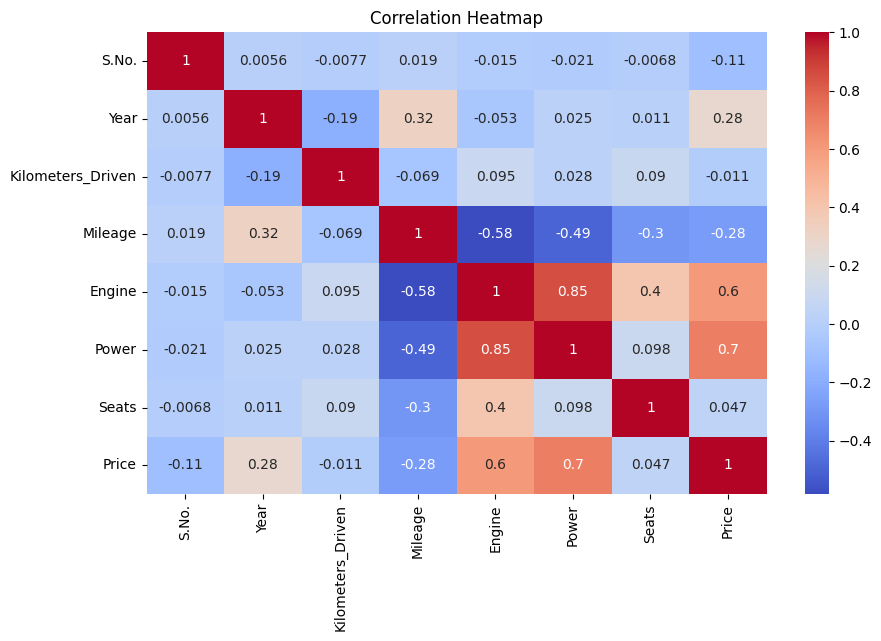

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


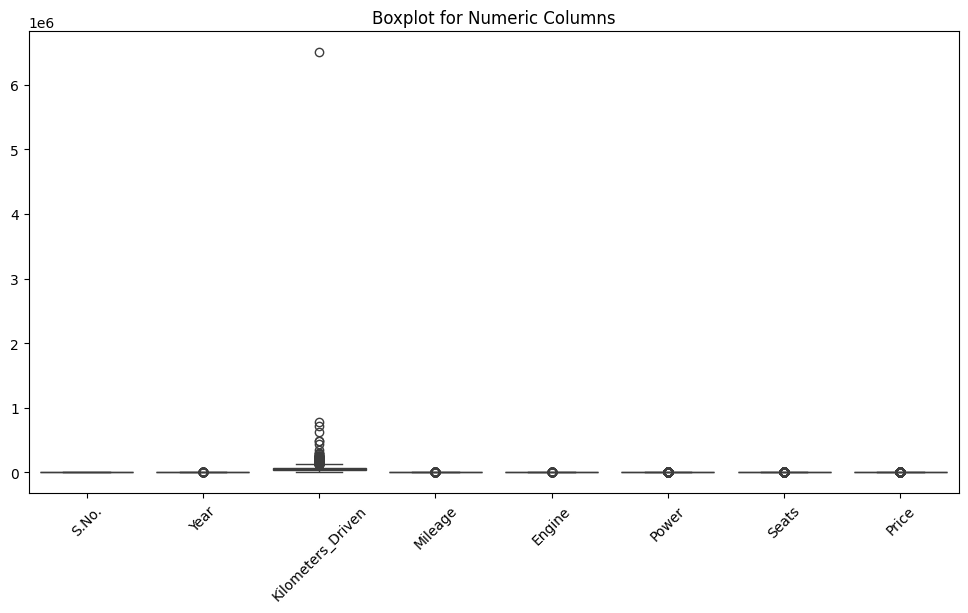

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplot for Numeric Columns")
plt.show()


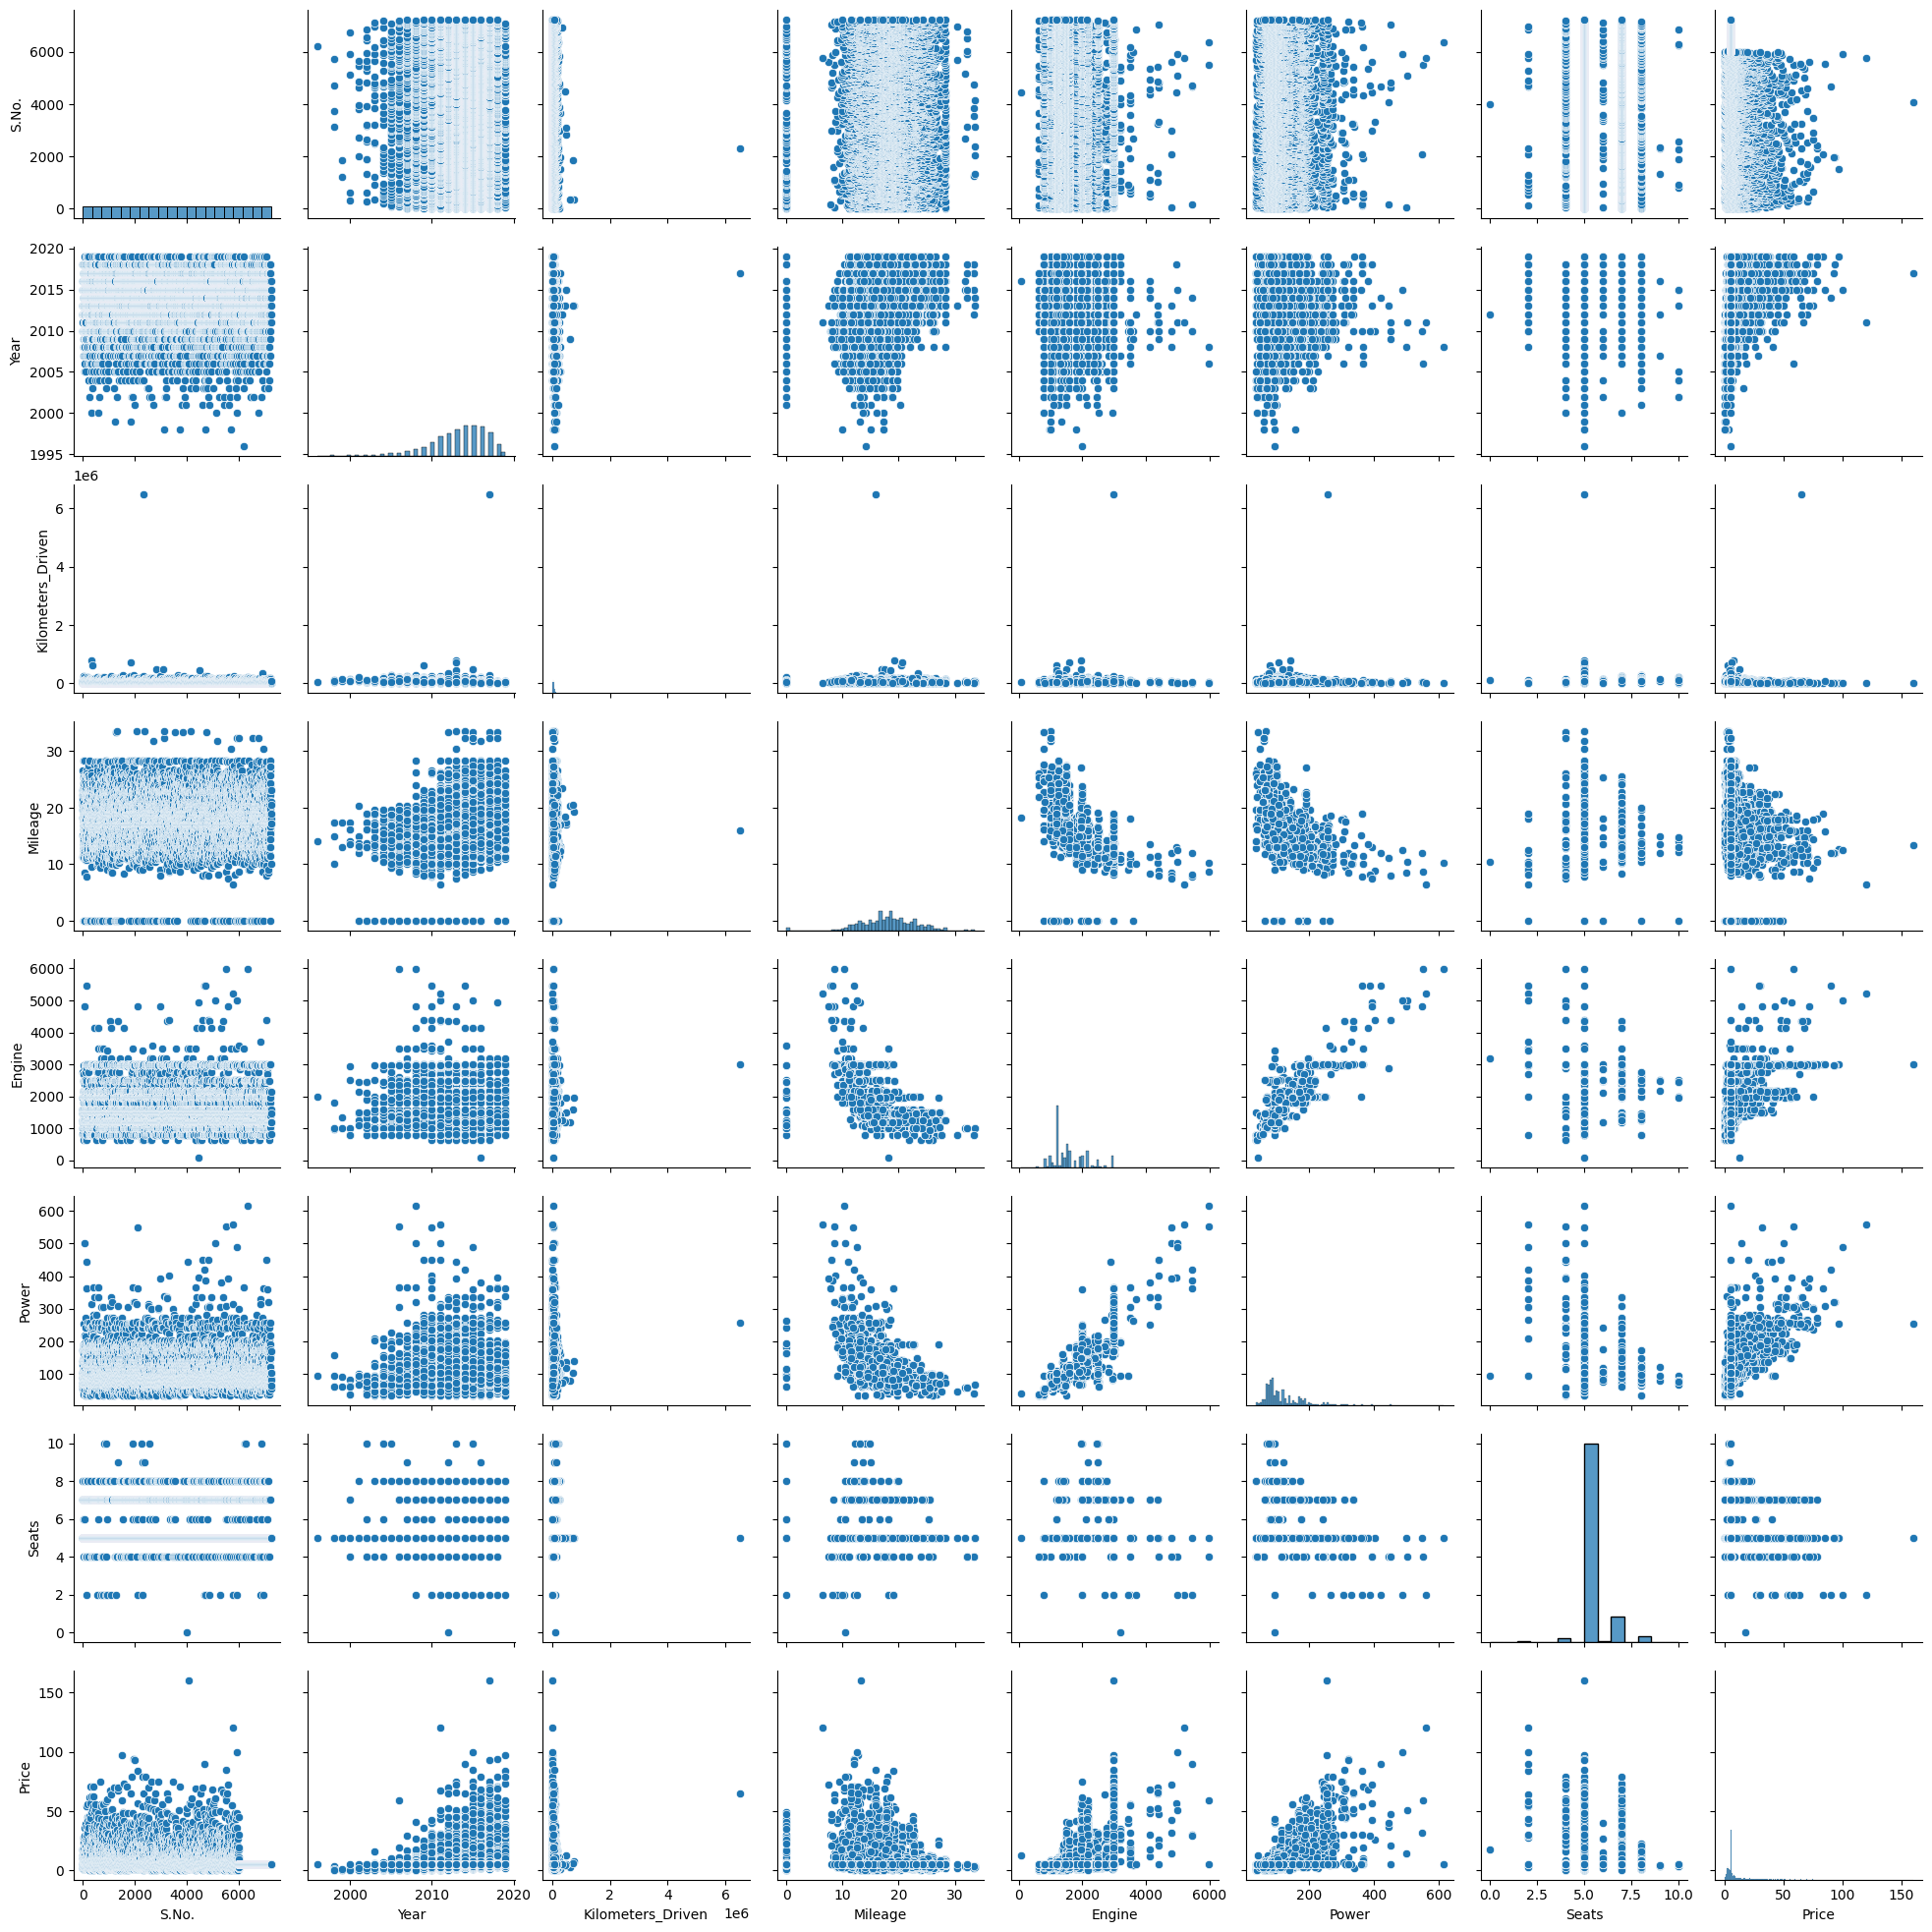

In [28]:
sns.pairplot(df[num_cols])
plt.show()


In [30]:
cols = num_cols[:3]

peacock_colors = [
    [0.0, "#001f3f"],   # deep navy
    [0.25, "#005f6a"],  # teal
    [0.5, "#008b8b"],   # dark cyan
    [0.75, "#00bfa6"],  # aqua green
    [1.0, "#7fffd4"]    # light aqua
]

fig = px.scatter_3d(
    df,
    x=cols[0],
    y=cols[1],
    z=cols[2],
    color=cols[2],
    color_continuous_scale=peacock_colors,
    title="3D Scatter Plot (Peacock Variant)"
)

fig.show()


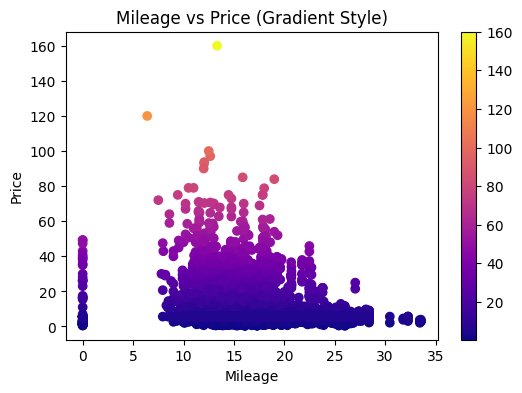

In [31]:
plt.figure(figsize=(6,4))
plt.scatter(
    df['Mileage'],
    df['Price'],
    c=df['Price'],
    cmap='plasma'
)
plt.colorbar()
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Mileage vs Price (Gradient Style)")
plt.show()